In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
%matplotlib inline

In [2]:
'''df = pd.concat(
    map(pd.read_csv, ['Dina Food.csv', 'School1.csv']), ignore_index=True)'''

"df = pd.concat(\n    map(pd.read_csv, ['Dina Food.csv', 'School1.csv']), ignore_index=True)"

In [3]:
df = pd.concat(
    map(pd.read_csv, ['Dina Food.csv', 'School1.csv','School2.csv','School3.csv']), ignore_index=True)
#df=pd.read_csv("Dina Food.csv", )
raw=df.copy()
df['Time_stamp']=pd.to_datetime(df['Time_stamp'])
#df.set_index("Time_stamp", inplace=True)
#df.drop(["Temperature"] , axis=1, inplace=True)
df.head()



,Time_stamp,Total_kwh
0,2021-08-01 00:00:00,47.71
1,2021-08-01 01:00:00,53.87
2,2021-08-01 02:00:00,50.19
3,2021-08-01 03:00:00,48.13
4,2021-08-01 04:00:00,44.67


In [4]:
data_df=df.resample("D", on='Time_stamp').mean()

In [5]:
data_df=data_df.reset_index()
data_df.head()

,Time_stamp,Total_kwh
0,2021-01-11,6.404792
1,2021-01-12,25.649375
2,2021-01-13,NaN
3,2021-01-14,NaN
4,2021-01-15,NaN


In [6]:
def features(data_df):
    
    data_df['date']=data_df['Time_stamp'].dt.day
    data_df['DayOfWeek']=data_df['Time_stamp'].dt.day_of_week
    data_df['WeekOfYear']=data_df['Time_stamp'].dt.isocalendar().week
    data_df['Day_name']=data_df['Time_stamp'].dt.day_name()
    data_df['Month_name']=data_df['Time_stamp'].dt.month_name()
    return 

In [7]:
features(data_df)
data_df.head()

,Time_stamp,Total_kwh,date,DayOfWeek,WeekOfYear,Day_name,Month_name
0,2021-01-11,6.404792,11,0,2,Monday,January
1,2021-01-12,25.649375,12,1,2,Tuesday,January
2,2021-01-13,NaN,13,2,2,Wednesday,January
3,2021-01-14,NaN,14,3,2,Thursday,January
4,2021-01-15,NaN,15,4,2,Friday,January


In [8]:
# Check data types in columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time_stamp  1055 non-null   datetime64[ns]
 1   Total_kwh   563 non-null    float64       
 2   date        1055 non-null   int64         
 3   DayOfWeek   1055 non-null   int64         
 4   WeekOfYear  1055 non-null   UInt32        
 5   Day_name    1055 non-null   object        
 6   Month_name  1055 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 54.7+ KB


In [9]:
# Get descriptive statistics summary of data set 
data_df.describe()

,Total_kwh,date,DayOfWeek,WeekOfYear
count,563.000000,1055.000000,1055.000000,1055.000000
mean,60.844753,15.795261,2.995261,25.991469
std,47.369215,8.784030,1.999757,14.580176
min,3.983333,1.000000,0.000000,1.000000
25%,18.219792,8.000000,1.000000,13.000000
50%,56.988438,16.000000,3.000000,26.000000
75%,88.327135,23.000000,5.000000,38.500000
max,171.407917,31.000000,6.000000,52.000000


In [10]:
# Display features in data set
data_df.columns

Index(['Time_stamp', 'Total_kwh', 'date', 'DayOfWeek', 'WeekOfYear',
       'Day_name', 'Month_name'],
      dtype='object')

In [11]:
#Operational Data Frame
data_df.shape

(1055, 7)

In [12]:
#Original DataFrame
df.shape

(37964, 2)

In [13]:
# Check for missing values in the columns
data_df.isna().values.any()

True

In [14]:
data_df=data_df.fillna(1)

In [15]:
data_df.isna().values.any()

False

In [16]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [17]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(data_df, test_size=0.20)

In [18]:
print(train)

     Time_stamp   Total_kwh  date  DayOfWeek  WeekOfYear   Day_name Month_name
839  2023-04-30    1.000000    30          6          17     Sunday      April
149  2021-06-09    1.000000     9          2          23  Wednesday       June
441  2022-03-28   79.233958    28          0          13     Monday      March
267  2021-10-05  157.273750     5          1          40    Tuesday    October
1028 2023-11-05    1.000000     5          6          44     Sunday   November
...         ...         ...   ...        ...         ...        ...        ...
155  2021-06-15    1.000000    15          1          24    Tuesday       June
131  2021-05-22    1.000000    22          5          20   Saturday        May
896  2023-06-26    1.000000    26          0          26     Monday       June
398  2022-02-13   49.932396    13          6           6     Sunday   February
294  2021-11-01  135.722083     1          0          44     Monday   November

[844 rows x 7 columns]


In [19]:
print(test)

     Time_stamp  Total_kwh  date  DayOfWeek  WeekOfYear   Day_name Month_name
450  2022-04-06  77.066719     6          2          14  Wednesday      April
897  2023-06-27   1.000000    27          1          26    Tuesday       June
1036 2023-11-13   1.000000    13          0          46     Monday   November
1049 2023-11-26   1.000000    26          6          47     Sunday   November
719  2022-12-31   7.730417    31          5          52   Saturday   December
...         ...        ...   ...        ...         ...        ...        ...
135  2021-05-26   1.000000    26          2          21  Wednesday        May
1054 2023-12-01  21.591875     1          4          48     Friday   December
690  2022-12-02   9.531458     2          4          48     Friday   December
594  2022-08-28   6.201875    28          6          34     Sunday     August
463  2022-04-19  83.875833    19          1          16    Tuesday      April

[211 rows x 7 columns]


In [20]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [21]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1,1)
y_train = train['Total_kwh']

In [22]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.04904527584520767
Intercept:  58.009771530249765


C:\Users\HP\AppData\Local\Temp\ipykernel_6152\4094384673.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


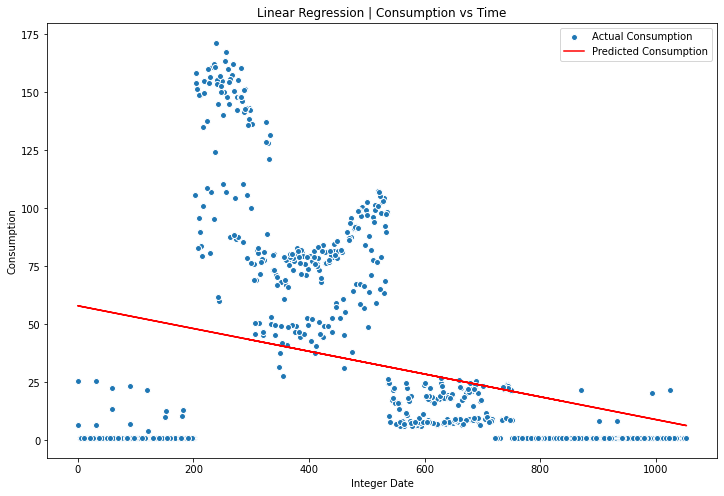

In [24]:
# Train set graph
plt.figure(1, figsize=(12,8))
plt.title('Linear Regression | Consumption vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Consumption')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Consumption')
plt.xlabel('Integer Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [25]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Total_kwh']

In [26]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [27]:
data_df.shape

(1055, 7)

In [28]:
# Generate 25 random numbers
randints = np.random.randint(334, size=10)

# Select row numbers == random numbers
data_df_sample = data_df[data_df.index.isin(randints)]

In [29]:
data_df_sample.head()

,Time_stamp,Total_kwh,date,DayOfWeek,WeekOfYear,Day_name,Month_name
8,2021-01-19,1.0,19,1,3,Tuesday,January
13,2021-01-24,1.0,24,6,3,Sunday,January
22,2021-02-02,1.0,2,1,5,Tuesday,February
29,2021-02-09,1.0,9,1,6,Tuesday,February
57,2021-03-09,1.0,9,1,10,Tuesday,March


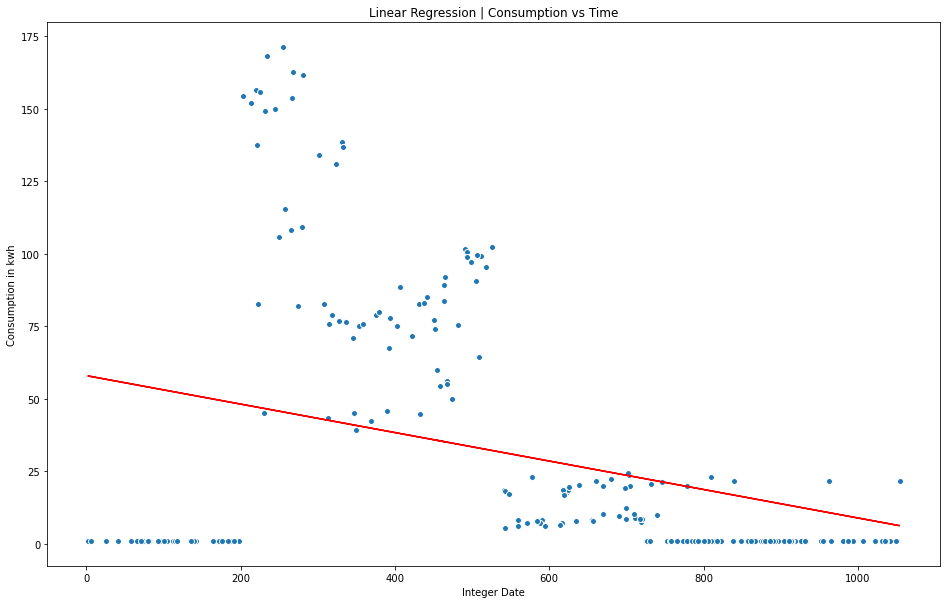

In [30]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Consumption vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Consumption')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Consumption')

plt.xlabel('Integer Date')
plt.ylabel('Consumption in kwh')

plt.show()

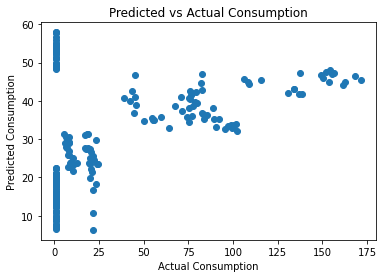

In [31]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')

plt.title('Predicted vs Actual Consumption')

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


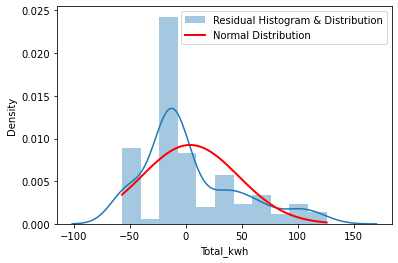

In [32]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [33]:
# Add new column for predictions to df
data_df['Prediction'] = model.predict(np.array(data_df.index).reshape(-1, 1))

In [34]:
data_df.head()

,Time_stamp,Total_kwh,date,DayOfWeek,WeekOfYear,Day_name,Month_name,Prediction
0,2021-01-11,6.404792,11,0,2,Monday,January,58.009772
1,2021-01-12,25.649375,12,1,2,Tuesday,January,57.960726
2,2021-01-13,1.000000,13,2,2,Wednesday,January,57.911681
3,2021-01-14,1.000000,14,3,2,Thursday,January,57.862636
4,2021-01-15,1.000000,15,4,2,Friday,January,57.813590


In [35]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [36]:
# Statistical summary of test data
df['Total_kwh'].describe()

count    37964.000000
mean        64.486907
std         65.480406
min          0.000000
25%          9.460000
50%         32.550000
75%        118.970000
max        591.960000
Name: Total_kwh, dtype: float64

In [37]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 32.681036286306906
Mean Squared Error: 1877.4460032917616
Root Mean Squared Error: 43.32950499707747


In [38]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.16018773166259437


In [39]:
#Decsion tree regression
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred3=dec.predict(X_test)

In [41]:
data_df['Prediction'] = dec.predict(np.array(data_df.index).reshape(-1, 1))
data_df

,Time_stamp,Total_kwh,date,DayOfWeek,WeekOfYear,Day_name,Month_name,Prediction
0,2021-01-11,6.404792,11,0,2,Monday,January,6.404792
1,2021-01-12,25.649375,12,1,2,Tuesday,January,25.649375
2,2021-01-13,1.000000,13,2,2,Wednesday,January,25.649375
3,2021-01-14,1.000000,14,3,2,Thursday,January,1.000000
4,2021-01-15,1.000000,15,4,2,Friday,January,1.000000
...,...,...,...,...,...,...,...,...
1050,2023-11-27,1.000000,27,0,48,Monday,November,1.000000
1051,2023-11-28,1.000000,28,1,48,Tuesday,November,1.000000
1052,2023-11-29,1.000000,29,2,48,Wednesday,November,1.000000
1053,2023-11-30,1.000000,30,3,48,Thursday,November,1.000000


In [42]:
print('R2: ', metrics.r2_score(y_test, y_pred3))

R2:  0.8825667954635578


In [43]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)
y_pred4=reg.predict(X_test)

In [44]:
y_pred4=reg.predict(X_test)

In [45]:
print('R2: ', metrics.r2_score(y_test, y_pred4))

R2:  0.9100355868702314


In [46]:
data_df['Prediction'] = reg.predict(np.array(data_df.index).reshape(-1, 1))
data_df.head()

,Time_stamp,Total_kwh,date,DayOfWeek,WeekOfYear,Day_name,Month_name,Prediction
0,2021-01-11,6.404792,11,0,2,Monday,January,11.745783
1,2021-01-12,25.649375,12,1,2,Tuesday,January,19.443617
2,2021-01-13,1.000000,13,2,2,Wednesday,January,19.443617
3,2021-01-14,1.000000,14,3,2,Thursday,January,6.338513
4,2021-01-15,1.000000,15,4,2,Friday,January,2.779504
